In [1]:
from pulp import*

In [2]:
#Define the model.
model = LpProblem(name="IE13_Assignment1", sense = LpMaximize)

In [3]:
#Define the sets.
period = list(range(13))

In [4]:
#Define the decision variables.
X = LpVariable.dicts("Amount of Production" , (period), lowBound = 0)
I = LpVariable.dicts("Inventory Level" , (period), lowBound = 0)
W = LpVariable.dicts("Regular Time Workhours Used" , (period), lowBound = 0)
O = LpVariable.dicts("Overtime Workhours Used" , (period), lowBound = 0)

In [5]:
#Define the parameters.

#demand:
dt = {
    0:0,
    1:280,
    2:301,
    3:277,
    4:310,
    5:285,
    6:278,
    7:291,
    8:277,
    9:304,
    10:295,
    11:302,
    12:297,
    13:0
}
I[0] = 150
I[12] = 150

#Constant Workforce Production
#Number of employees:
ne = 100
#Manhours required to produce one unit of the product:
k = 100
#The cost per manhour of regular labor in month t:
wt = 10
#The cost per manhour overtime labor in month t:
ot = 15
#The unit production cost in month t:
vt = 1000
#The unit inventory cost in month t:
ct = 100
#The subcontracting cost
sb = 2300
#The sale price
spt = {
    0:0,
    1:2600,
    2:2600,
    3:2600,
    4:2600,
    5:2600,
    6:2600,
    7:2600,
    8:2600,
    9:2600,
    10:2600,
    11:2600,
    12:2600,
    13:0
}

#The total manhours of regular labor available in month t:
rmt = 20 * 2 * 8 * ne
#The total manhours of overtime labor available in month t:
owt = 20 * 2 * ne #multplied by 2 because of 2 shifts


In [6]:
#Define the constraints.
for t in period[1:]:
    model += (X[t] + I[t-1] == dt[t] + I[t] , "Balance Equation %s"%t)
    model += (k*X[t] <= W[t] + O[t] , "Workhours Availability %s"%t)
    model += (W[t] == rmt , "Regular Workhour Constraint %s"%t)
    model += (O[t] <= owt , "Overtime Workhours Constraint %s"%t)
    model += (I[t] >= 100 , "Safety Stock Constraint %s"%t)
#Define the objective function.
model += lpSum(spt[t] * dt[t] - vt * X[t] - ct * I[t] - wt* W[t] - ot * O[t] for t in period[1:])

In [7]:
model

IE13_Assignment1:
MAXIMIZE
-1000*Amount_of_Production_1 + -1000*Amount_of_Production_10 + -1000*Amount_of_Production_11 + -1000*Amount_of_Production_12 + -1000*Amount_of_Production_2 + -1000*Amount_of_Production_3 + -1000*Amount_of_Production_4 + -1000*Amount_of_Production_5 + -1000*Amount_of_Production_6 + -1000*Amount_of_Production_7 + -1000*Amount_of_Production_8 + -1000*Amount_of_Production_9 + -100*Inventory_Level_1 + -100*Inventory_Level_10 + -100*Inventory_Level_11 + -100*Inventory_Level_2 + -100*Inventory_Level_3 + -100*Inventory_Level_4 + -100*Inventory_Level_5 + -100*Inventory_Level_6 + -100*Inventory_Level_7 + -100*Inventory_Level_8 + -100*Inventory_Level_9 + -15*Overtime_Workhours_Used_1 + -15*Overtime_Workhours_Used_10 + -15*Overtime_Workhours_Used_11 + -15*Overtime_Workhours_Used_12 + -15*Overtime_Workhours_Used_2 + -15*Overtime_Workhours_Used_3 + -15*Overtime_Workhours_Used_4 + -15*Overtime_Workhours_Used_5 + -15*Overtime_Workhours_Used_6 + -15*Overtime_Workhours_Used_7 

In [8]:
model.solve()
LpStatus[model.status]

'Optimal'

In [9]:
print("Optimal objective function value = ", value(model.objective))

Optimal objective function value =  1626600.0


In [10]:
for v in model.variables():
    print(v.name, "=", v.varValue)

Amount_of_Production_1 = 230.0
Amount_of_Production_10 = 304.0
Amount_of_Production_11 = 320.0
Amount_of_Production_12 = 320.0
Amount_of_Production_2 = 301.0
Amount_of_Production_3 = 277.0
Amount_of_Production_4 = 310.0
Amount_of_Production_5 = 285.0
Amount_of_Production_6 = 278.0
Amount_of_Production_7 = 291.0
Amount_of_Production_8 = 277.0
Amount_of_Production_9 = 304.0
Inventory_Level_1 = 100.0
Inventory_Level_10 = 109.0
Inventory_Level_11 = 127.0
Inventory_Level_2 = 100.0
Inventory_Level_3 = 100.0
Inventory_Level_4 = 100.0
Inventory_Level_5 = 100.0
Inventory_Level_6 = 100.0
Inventory_Level_7 = 100.0
Inventory_Level_8 = 100.0
Inventory_Level_9 = 100.0
Overtime_Workhours_Used_1 = 0.0
Overtime_Workhours_Used_10 = 0.0
Overtime_Workhours_Used_11 = 0.0
Overtime_Workhours_Used_12 = 0.0
Overtime_Workhours_Used_2 = 0.0
Overtime_Workhours_Used_3 = 0.0
Overtime_Workhours_Used_4 = 0.0
Overtime_Workhours_Used_5 = 0.0
Overtime_Workhours_Used_6 = 0.0
Overtime_Workhours_Used_7 = 0.0
Overtime_Workh

In [12]:
import pandas as pd
production_index = [0,4,5,6,7,8,9,10,11,1,2,3]
inventory_index = [12,15,16,17,18,19,20,21,22,13,14]
overtime_index = [23,27,28,29,30,31,32,33,34,24,25,26]
regular_index = [35,39,40,41,42,43,44,45,46,36,37,38]
demand=[]
production = []
inventory = []
regular_workhours = []
overtime_workhours = []
working_utilization = []
for i in range(1,13):
    demand.append(list(dt.values())[i])
for i in inventory_index:
    inventory.append(model.variables()[i].varValue)
inventory.append(150)
for i in overtime_index:
    overtime_workhours.append(model.variables()[i].varValue)
for i in regular_index:
    regular_workhours.append(model.variables()[i].varValue)
for i in production_index:
    production.append(model.variables()[i].varValue)
for i in production_index:
    working_utilization.append(32000-model.variables()[i].varValue*100)

d = {
    'Months' : ["January", "February", "March", "April" , "May", "June",
               "July" , "August" , "September" , "October" , "November" , "December"],
    'Amount of Production' : production,
    'Inventory Level At The End Of The Month' : inventory,
    'Regular Time Workhours' : regular_workhours,
    'Overtime Workhours' : overtime_workhours,
    'Amount of Excess Hours' : working_utilization
}
df = pd.DataFrame(data=d)
df

,Months,Amount of Production,Inventory Level At The End Of The Month,Regular Time Workhours,Overtime Workhours,Amount of Excess Hours
0,January,230.0,100.0,32000.0,0.0,9000.0
1,February,301.0,100.0,32000.0,0.0,1900.0
2,March,277.0,100.0,32000.0,0.0,4300.0
3,April,310.0,100.0,32000.0,0.0,1000.0
4,May,285.0,100.0,32000.0,0.0,3500.0
5,June,278.0,100.0,32000.0,0.0,4200.0
6,July,291.0,100.0,32000.0,0.0,2900.0
7,August,277.0,100.0,32000.0,0.0,4300.0
8,September,304.0,100.0,32000.0,0.0,1600.0
9,October,304.0,109.0,32000.0,0.0,1600.0


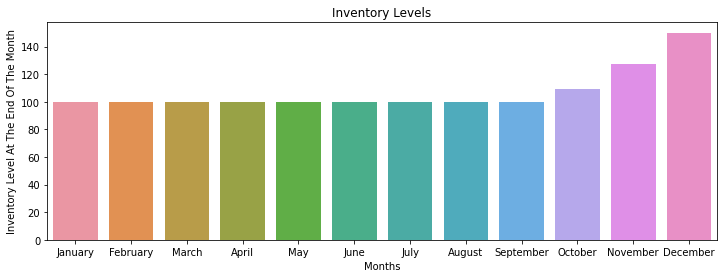

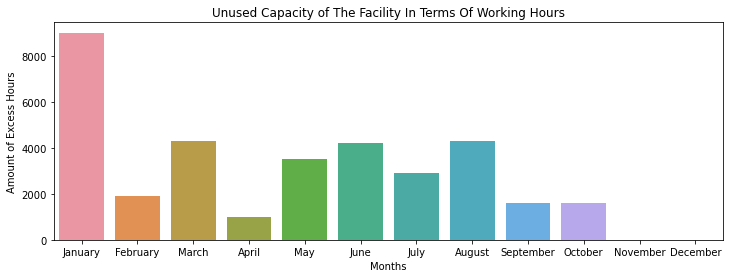

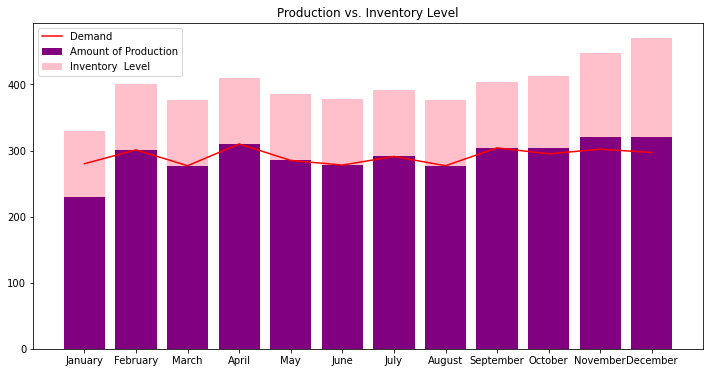

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))
sns.barplot(data=df, x = "Months",y = "Inventory Level At The End Of The Month")
plt.title("Inventory Levels")
plt.show()
plt.figure(figsize=(12,4))
sns.barplot(data=df, x = "Months",y = "Amount of Excess Hours")
plt.title("Unused Capacity of The Facility In Terms Of Working Hours")
plt.show()
plt.figure(figsize=(12,6))
plt.bar(df["Months"],df["Amount of Production"], color='purple')
plt.bar(df["Months"],df["Inventory Level At The End Of The Month"], bottom=df["Amount of Production"], color='pink')
plt.plot(demand, color = 'red')
plt.legend(['Demand','Amount of Production', 'Inventory  Level'])
plt.title("Production vs. Inventory Level")
plt.show()